In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Banana lenght=8
# Banana width = 4
# Apple lenght= 6
# Apple width=6

N=100
std =0.4
banana_width = np.random.normal(4,std,N)
banana_length = np.random.normal(8,std,N)
apple_width = np.random.normal(6,std,N)
apple_length = np.random.normal(6,std,N)

width = np.concatenate((banana_width,apple_width))
length =np.concatenate((banana_length,apple_length))

X = np.array([width,length]).T

bananas_label = np.zeros(N,dtype = 'int')
apples_label = np.ones(N,dtype = 'int')

Y = np.concatenate((bananas_label,apples_label))


Text(0, 0.5, 'length')

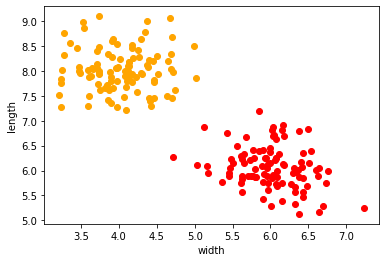

In [7]:
plt.scatter(X[0:N,0],X[0:N,1],c='orange')
plt.scatter(X[N:,0],X[N:,1], c='red')
plt.xlabel('width')
plt.ylabel('length')

In [40]:
class KNearestNeighbors:
    def __init__(self,k):
        self.k = k
    
    #train
    def fit(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_classes = len(np.unique(y_train))
    def euclidianDistance(self,a,b):
        return np.sqrt(np.sum((a-b)**2, axis=1))
    
    def nearNeighbors(self,x_test):
        point_dist = []
        for x_test in x_test:
            point_dist.append(self.euclidianDistance(x_test,self.x_train))
            
        neigh_ind = []
        for row in point_dist:
            near_neighbors = np.argsort(row)[:self.k]
            neigh_ind.append(near_neighbors)
            
        return np.array(neigh_ind)
    
    #test
    def predict(self,x_test):
        neighbors = self.nearNeighbors(x_test)
        y_pred = []
        for neighbor in neighbors:
            y_pred.append(np.argmax(np.bincount(self.y_train[neighbor])))
            
        return np.array(y_pred)
    
    def evaluate(self,X_test,Y_test):
        self.X_test = X_test
        self.Y_test = Y_test
        y_predict = np.zeros(len(self.X_test))
        for i,test in enumerate(self.X_test):
            y_predict[i]=self.predict(test)
        evaluation = (y_predict == self.Y_test).sum()/len(self.Y_test)
        print(evaluation)
                     
            

In [41]:
knn = KNearestNeighbors(k=5)
knn.fit(X,Y)

In [42]:
new_fruits = np.array([[4.5,6.9],[5.6,7.2]])
y_pred = knn.predict(new_fruits)
print(y_pred)

[0 1]


In [117]:
x_test = np.array([5,4])
y_test = np.array([3,7])

In [ ]:
# ------------------------------------------------------------------------------------
# knn on iris

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [76]:
iris_data = pd.read_csv('IRIS.csv')

In [77]:

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
iris_data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [79]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
x=iris_data.iloc[:,:4]
y=iris_data.iloc[:,-1]

In [81]:
x = preprocessing.StandardScaler().fit_transform(x)
x[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [83]:
y_test.shape

(45,)

In [105]:
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(x_train,y_train)
y_predict1 = knnmodel.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
acc = accuracy_score(y_test,y_predict1)

In [108]:
print(acc)

0.9777777777777777


In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [110]:
cmr = pd.DataFrame(data=cm,index = ['setosa','versicolor','virginica'],
                   columns = ['setosa','versicolor','virginica'])
cmr

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,1,12


In [115]:
predict_output = pd.DataFrame(data = [y_test.values,y_predict1], index = ['y_test','y_predict1'])
predict_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [116]:
predict_output.iloc[0,:].value_counts()

Iris-versicolor    18
Iris-setosa        14
Iris-virginica     13
Name: y_test, dtype: int64